## Make Dataset Classification using NCM with Dimension Reduction

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestCentroid

In [2]:
comparison_test = []
comparison_time = []

## NCM with PCA feature 3

In [3]:
features, target = make_classification(n_samples=15000, n_features=4, n_informative=4, n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=0)

pca = PCA(n_components=3)
features = pca.fit(features).transform(features)
target = target

print(features.shape)

(15000, 3)


In [4]:
avg_test_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k = 1

    nc = NearestCentroid()
    nc.fit(x_train, y_train)

    start = time.perf_counter()
    test_score = nc.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print("-----" * 8)
print("Test set score: %f" % np.array(avg_test_acc).mean())
print("Training Time : %.4f" % np.array(avg_time).mean(), "sec")

comparison_test.append(np.array(avg_test_acc).mean())
comparison_time.append(np.array(avg_time).mean())

train size :  12000  / test size :  3000
----------------------------------------
Test set score: 0.887067
Training Time : 0.0034 sec


## NCM with PCA feature 2

In [5]:
features, target = make_classification(n_samples=15000, n_features=4, n_informative=4, n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=0)

pca = PCA(n_components=2)
features = pca.fit(features).transform(features)
target = target

print(features.shape)

(15000, 2)


In [6]:
avg_test_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k = 1

    nc = NearestCentroid()
    nc.fit(x_train, y_train)

    start = time.perf_counter()
    test_score = nc.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print("-----" * 8)
print("Test set score: %f" % np.array(avg_test_acc).mean())
print("Training Time : %.4f" % np.array(avg_time).mean(), "sec")

comparison_test.append(np.array(avg_test_acc).mean())
comparison_time.append(np.array(avg_time).mean())

train size :  12000  / test size :  3000
----------------------------------------
Test set score: 0.860733
Training Time : 0.0033 sec


## Nearest Class Mean

In [7]:
features, target = make_classification(n_samples=15000, n_features=4, n_informative=4, n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=0)

In [8]:
avg_test_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k = 1

    nc = NearestCentroid()
    nc.fit(x_train, y_train)

    start = time.perf_counter()
    test_score = nc.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print("-----" * 8)
print("Test set score: %f" % np.array(avg_test_acc).mean())
print("Training Time : %.4f" % np.array(avg_time).mean(), "sec")

comparison_test.append(np.array(avg_test_acc).mean())
comparison_time.append(np.array(avg_time).mean())

train size :  12000  / test size :  3000
----------------------------------------
Test set score: 0.890667
Training Time : 0.0033 sec


### Method Comparison

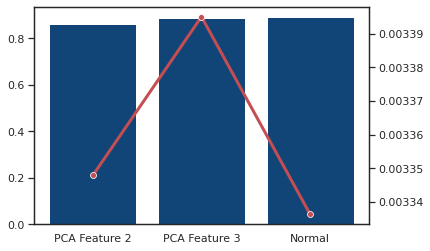

In [9]:
import seaborn as sns

sns.set(style="white", rc={"lines.linewidth": 3})

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

sns.barplot(x=["PCA Feature 2", "PCA Feature 3", "Normal"],
            y=[comparison_test[1], comparison_test[0], comparison_test[2]], 
            color='#004488',
            ax=ax1)

sns.lineplot(x=["PCA Feature 2", "PCA Feature 3", "Normal"], 
             y=[comparison_time[1], comparison_time[0], comparison_time[2]],
             color='r',
             marker="o",
             ax=ax2)
plt.show()
sns.set()